## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

*  Supervised learning Models that can predict labels based on labeled training data.
*  Classification Models that predict labels as two or more discrete categories 
*  Regression Models that predict continuous labels 
*  Unsupervised learning Models that identify structure in unlabeled data 
*  Clustering Models that detect and identify distinct groups in the data 
*  Dimensionality reduction Models that detect and identify lower-dimensional structure in higherdimensional data

### Data Representation in Scikit-Learn

In [2]:
iris = sns.load_dataset('iris')       
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. 

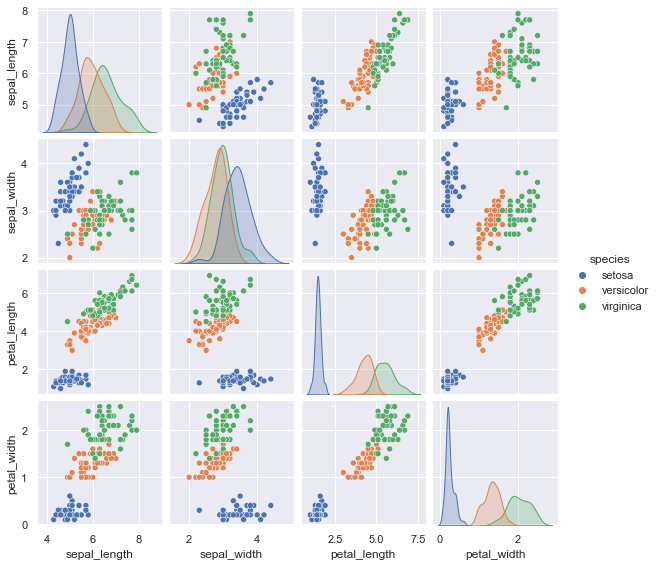

In [3]:
sns.pairplot(iris, hue='species', height=2);


#### For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame, 

In [4]:
iris.shape

(150, 5)

In [5]:
x_iris =  iris.drop('species', axis=1) 
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Supervised learning example: Simple linear regression 

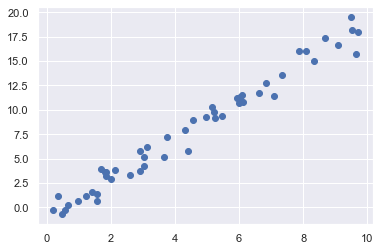

In [7]:
rng = np.random.RandomState(42)       
x = 10 * rng.rand(50)       
y = 2 * x - 1 + rng.randn(50)       
plt.scatter(x, y)
plt.show()


### 1. Choose a class of model. 

In [8]:
from sklearn.linear_model import LinearRegression 

###  we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_inter cept hyperparameter: 

In [9]:
model = LinearRegression(fit_intercept=True)       
model


LinearRegression()

### 3. Arrange data into a features matrix and target vector.

In [10]:
X = x[:, np.newaxis]       
X.shape


(50, 1)

### 4. Fit the model to your data.

In [11]:
model.fit(X, y)

LinearRegression()

In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311164

### 5. Predict labels for unknown data.

 *  In Scikit-Learn, we can do this using the predict() method. 
 *  For the sake of this example, our “new data” will be a grid of x values, and we will ask what y values the model predicts

In [14]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [15]:
Xfit = xfit[:, np.newaxis]        
xfit.shape


(50,)

In [16]:
yfit = model.predict(Xfit) 

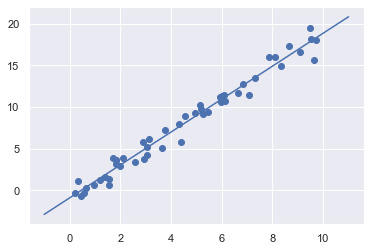

In [17]:
plt.scatter(x, y)        
plt.plot(xfit, yfit)

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:


In [19]:
from sklearn.model_selection import train_test_split        

Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1) 
# defualt is 75% train and 25%test
## we can pass parameter as train_size or test_size

In [20]:
print(Xtrain.shape , Xtest.shape)

(112, 4) (38, 4)


### Gaussian naive Bayes is often a good model to use as a baseline classification,

In [21]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class        
    
model = GaussianNB()                       # 2. instantiate model        
model.fit(Xtrain, ytrain)                  # 3. fit model to data        
y_model = model.predict(Xtest)

### we can use the accuracy_score utility to see the fraction of predicted labels that match their true value

In [22]:
from sklearn.metrics import accuracy_score        
accuracy_score(ytest, y_model)


0.9736842105263158

Accuracy score is make for classification problems:
R2.score is made for continous variables, so for regression problems:

### With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset

In [23]:
from sklearn.model_selection import cross_val_score       
cross_val_score(model, x_iris, y_iris, cv=5)


array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [24]:
from sklearn.model_selection import LeaveOneOut       
scores = cross_val_score(model, x_iris, y_iris, cv=LeaveOneOut())       
print(scores)
scores.mean()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


0.9533333333333334

## Unsupervised learning example: Iris dimensionality

The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data; after all, it is much easier to plot data in two dimensions than in four dimensions or higher! 

In [25]:
from sklearn.decomposition import PCA  # 1. Choose the model class 
model = PCA(n_components=2)      # 2. Instantiate the model with hyperparameters 
model.fit(x_iris)                # 3. Fit to data. Notice y is not specified! 
X_2D = model.transform(x_iris)   # 4. Transform the data to two dimensions 

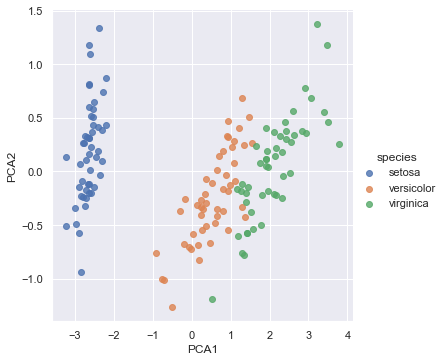

In [26]:
iris['PCA1'] = X_2D[:, 0]        
iris['PCA2'] = X_2D[:, 1]        

sns.lmplot(x = "PCA1",y =  "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset

### Unsupervised learning: Iris clustering

powerful clustering method called a Gaussian mixture model (GMM)

In [27]:
from sklearn import mixture # 1. Choose the model class 
model = mixture.GaussianMixture(n_components=3, covariance_type='full')  # 2. Instantiate the model w/ hyperparameters 
model.fit(x_iris)                    # 3. Fit to data. Notice y is not specified! 
y_gmm = model.predict(x_iris)        # 4. Determine cluster labels

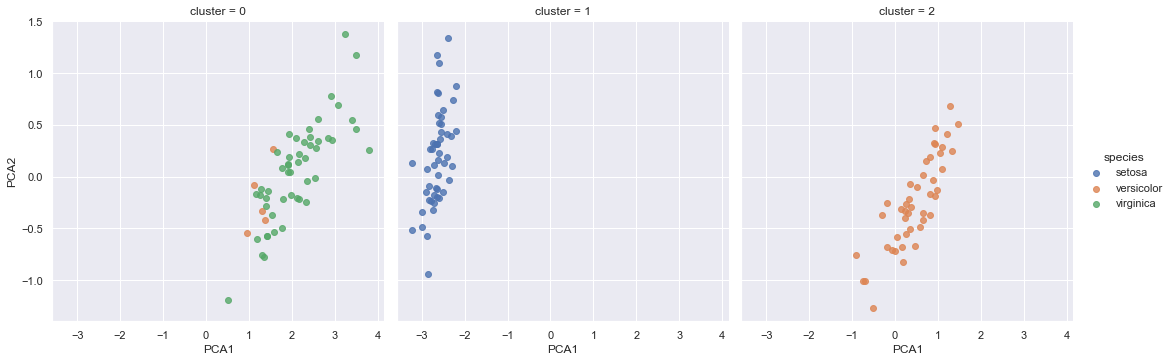

In [28]:
iris['cluster'] = y_gmm 
sns.lmplot(x = "PCA1", y = "PCA2", data=iris, hue='species',col='cluster', fit_reg=False)

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


In [30]:
from sklearn.neighbors import KNeighborsClassifier       
model = KNeighborsClassifier(n_neighbors=2)
model.fit(Xtrain, ytrain)                          
y_model = model.predict(Xtest)



In [31]:
from sklearn.metrics import accuracy_score        
accuracy_score(ytest, y_model)

1.0

### Selecting the Best Model

 the question of “the best model” is about finding a sweet spot in the trade-off between bias and variance


### Polynomial regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures        
from sklearn.linear_model import LinearRegression        
from sklearn.pipeline import make_pipeline

        
def PolynomialRegression(degree=2, **kwargs):            
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs)) 

In [33]:
def make_data(N, err=1.0, rseed=1):            # randomly sample the data            
    rng = np.random.RandomState(rseed)            
    X = rng.rand(N, 1) ** 2            
    y = 10 - 1. / (X.ravel() + 0.1)            
    if err > 0:                
        y += err * rng.randn(N)            
    return X, y

X, y = make_data(40) 

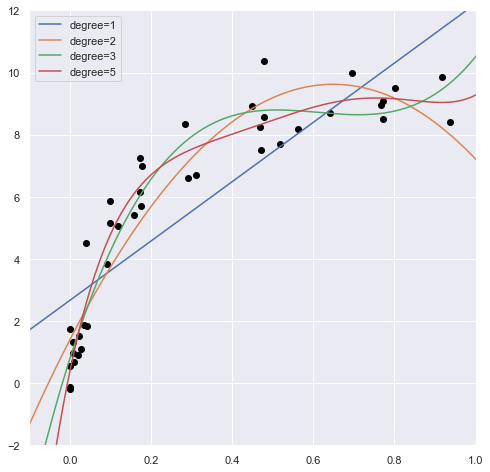

In [34]:
plt.figure(figsize=(8,8))
X_test = np.linspace(-0.1, 1.1, 500)[:, None] # same as np.newaxis
plt.scatter(X.ravel(), y, color='black')        #ravel() is opposite

#axis = plt.axis()        
for degree in [1,2, 3, 5]:            
    model = PolynomialRegression(degree)
    y_test = model.fit(X, y).predict(X_test)            
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))        
plt.xlim(-0.1, 1.0)        
plt.ylim(-2, 12)        
plt.legend(loc=0)
plt.show()

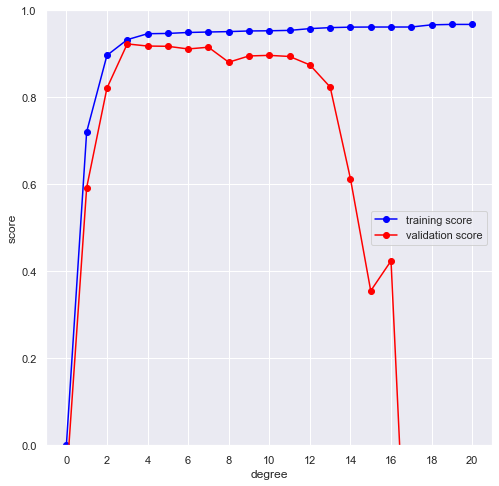

In [35]:

from sklearn.model_selection import validation_curve 

degree = np.arange(0, 21) 
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          param_name = 'polynomialfeatures__degree',param_range= degree, cv=7)
plt.figure(figsize=(8,8))
plt.plot(degree, np.median(train_score, 1),'-o', color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1),'-o', color='red', label='validation score') 
plt.legend(loc= 0) 
plt.ylim(0, 1) 
plt.xticks(range(0,22,2))
plt.xlabel('degree') 
plt.ylabel('score'); 

we can read off that the optimal trade-off between bias and variance is found for a third-order polynomial

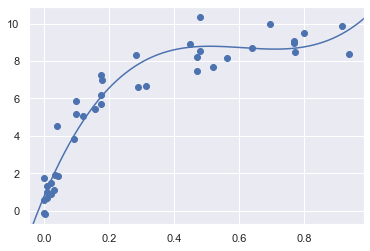

In [36]:
plt.scatter(X.ravel(), y)        
lim = plt.axis()        
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)        
plt.plot(X_test.ravel(), y_test);        
plt.axis(lim)
plt.show()

### Learning Curves

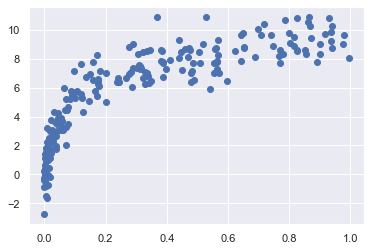

In [37]:
X2, y2 = make_data(200)        
plt.scatter(X2.ravel(), y2);

Text(0, 0.5, 'score')

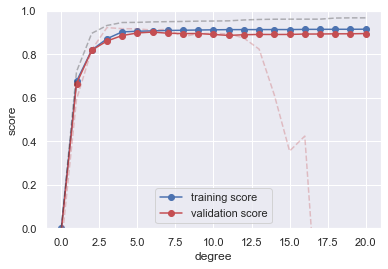

In [38]:
degree = np.arange(21) 
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,param_name='polynomialfeatures__degree',param_range=degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), '-ob',label='training score') 
plt.plot(degree, np.median(val_score2, 1), '-or', label='validation score') 
plt.plot(degree, np.median(train_score, 1), '--k', alpha=0.3) 
plt.plot(degree, np.median(val_score, 1), '--r', alpha=0.3,linestyle='dashed') 
plt.legend(loc=0) 
plt.ylim(0, 1)
plt.xlabel('degree') 
plt.ylabel('score')



 A plot of the training/validation score with respect to the size of the training set is known as a learning curve. 

### Validation in Practice: Grid Search

In [39]:
 from sklearn.model_selection import GridSearchCV
        
param_grid = {'polynomialfeatures__degree': np.arange(21),                      
              'linearregression__fit_intercept': [True, False],                      
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7) 

 We will explore a three-dimensional grid of model features—namely, the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem

In [40]:
grid.fit(X, y)
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

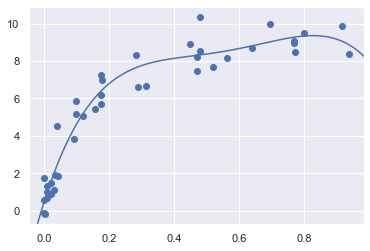

In [41]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)        
lim = plt.axis()        
y_test = model.fit(X, y).predict(X_test)        
plt.plot(X_test.ravel(), y_test)       
plt.axis(lim)

The best-fit model determined via an automatic grid-search 

## Feature Engineering

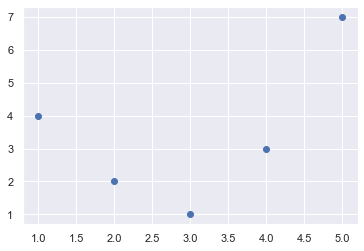

In [42]:
x = np.array([1, 2, 3, 4, 5])        
y = np.array([4, 2, 1, 3, 7])        

plt.scatter(x, y);


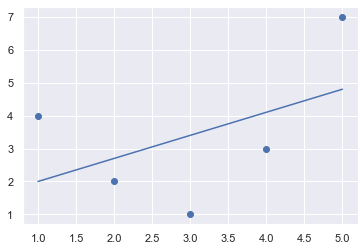

In [43]:
from sklearn.linear_model import LinearRegression        
X = x[:, np.newaxis]        
model = LinearRegression().fit(X, y)        
yfit = model.predict(X)        
plt.scatter(x, y)        
plt.plot(x, yfit)

In [44]:
yfit

array([2. , 2.7, 3.4, 4.1, 4.8])

In [45]:
from sklearn.preprocessing import PolynomialFeatures        
poly = PolynomialFeatures(degree=2, include_bias=False)        
X2 = poly.fit_transform(X)        
print(X2)


[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


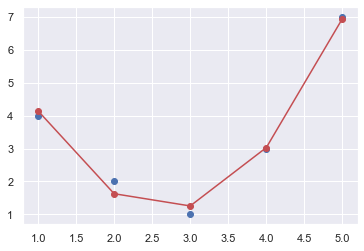

In [46]:
model = LinearRegression().fit(X2, y)        
yfit = model.predict(X2)        
plt.scatter(x, y )        
plt.plot(x, yfit , '-or')

In [47]:
yfit

array([4.14285714, 1.62857143, 1.25714286, 3.02857143, 6.94285714])

## Imputation of Missing Data 

In [48]:
from numpy import nan

X = np.array([[ nan, 0,   3  ],                      
              [ 3,   7,   9  ],                      
              [ 3,   5,   2  ],                      
              [ 4,   nan, 6  ],                      
              [ 8,   8,   1  ]])        

y = np.array([14, 16, -1,  8, -5]) 

In [49]:
np.nanmean(X)

4.538461538461538

In [50]:
from sklearn.impute import SimpleImputer       
imp = SimpleImputer(strategy='mean')        
X2 = imp.fit_transform(X)        
X2


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [51]:
model = LinearRegression().fit(X2, y)        
model.predict(X2)


array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [52]:
X

array([[nan,  0.,  3.],
       [ 3.,  7.,  9.],
       [ 3.,  5.,  2.],
       [ 4., nan,  6.],
       [ 8.,  8.,  1.]])

## Feature Pipelines

In [53]:
from sklearn.pipeline import make_pipeline
        
model = make_pipeline(SimpleImputer(strategy='mean'),                              
                      PolynomialFeatures(degree=2),                              
                      LinearRegression()) 

model.fit(X, y)  # X with missing values, from above        
print(y)        
print(model.predict(X))


[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## In Depth: Linear models

In [59]:
from sklearn import datasets 
iris = datasets.load_iris() 

print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [60]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [62]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [65]:
iris = sns.load_dataset('iris')       
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
